# Customer Churn Prediction

Use a telecom dataset to predict whether a customer will churn based on their usage, service complaints and other features. This will involve handling imbalanced data and feature engineering.
Metric to optimize : Accuracy and F1-score.
Predict Churn in the best possible manner!
Column names should be self-explanatory.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn-Data.csv')
df

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5630,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5631,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5632,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [3]:
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [4]:
df.sample(5)

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
654,7621-VPNET,Female,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.90,3729.75,No
93,8696-JKZNU,Female,1,No,No,37,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,2841.55,Yes
5405,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
617,4307-KWMXE,Male,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,35.75,389.8,No
4890,4310-KEDTB,Female,0,No,Yes,26,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.5,No


In [5]:
df.drop('cID',axis='columns',inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling     object
Method_Payment       object
Charges_Month       float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['1336.8', '5129.45', '23.45', ..., '306.05', '1200.15', '457.3'],
      dtype=object)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
# Fill NaN values with 0 (or any other value you deem appropriate)
df['TotalCharges'].fillna(0, inplace=True)


In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5629    False
5630    False
5631    False
5632    False
5633    False
Name: TotalCharges, Length: 5634, dtype: bool

In [17]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn


In [18]:
df.shape

(5634, 20)

In [19]:
df.iloc[488].TotalCharges

655.5

In [20]:
df[df.TotalCharges !=''].shape

(5634, 20)

# Remove rows with space in TotalChares

In [21]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(5634, 20)

In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling     object
Method_Payment       object
Charges_Month       float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [24]:
df1.TotalCharges.values

array([1336.8 , 5129.45,   23.45, ...,  306.05, 1200.15,  457.3 ])

In [25]:
df1[df1.Churn=='NO']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn


# Data Visualization

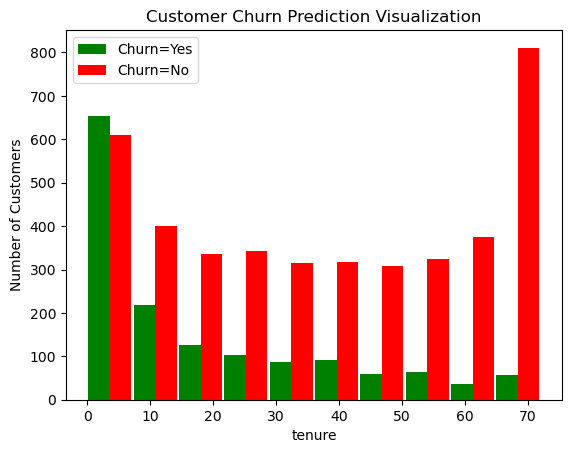

In [26]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure


plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")


plt.hist([tenure_churn_yes,tenure_churn_no], rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

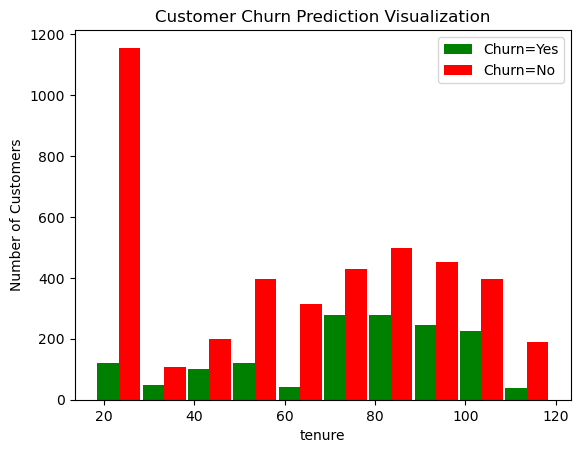

In [27]:
mc_churn_no= df1[df1.Churn=="No"].Charges_Month
mc_churn_yes= df1[df1.Churn=="Yes"].Charges_Month

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")


plt.hist([mc_churn_yes,mc_churn_no], rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [28]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [29]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['No' 'Yes']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['Yes' 'No' 'No internet service']
OnlineBackup: ['No' 'Yes' 'No internet service']
DeviceProtection: ['Yes' 'No' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
TV_Streaming: ['No' 'Yes' 'No internet service']
Movie_Streaming: ['Yes' 'No' 'No internet service']
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
Method_Payment: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [30]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [31]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['No' 'Yes']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['Yes' 'No']
OnlineBackup: ['No' 'Yes']
DeviceProtection: ['Yes' 'No']
TechSupport: ['No' 'Yes']
TV_Streaming: ['No' 'Yes']
Movie_Streaming: ['Yes' 'No']
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: ['No' 'Yes']
Method_Payment: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# Convert Yes and No to 1 or 0

In [32]:
yes_no_columns =['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','TV_Streaming','Movie_Streaming','PaperlessBilling','Churn']
                 
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

In [33]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [21 54  1  4  0  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26
 49 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52
 43 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67
 62]
PhoneService: [1 0]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [0 1]
TV_Streaming: [0 1]
Movie_Streaming: [1 0]
Contract: ['One year' 'Two year' 'Month-to-month']
PaperlessBilling: [0 1]
Method_Payment: ['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automatic)']
Charges_Month: [64.85 97.2  23.45 ... 59.25 35.35 21.15]
TotalCharges: [1336.8  5129.45   23.45 ...  306.05 1200.15  457.3 ]
Churn: [0 1]


In [34]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [35]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [36]:
#One Hot encoding for categorical columns

In [37]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','Method_Payment'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'TV_Streaming', 'Movie_Streaming',
       'PaperlessBilling', 'Charges_Month', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Method_Payment_Bank transfer (automatic)',
       'Method_Payment_Credit card (automatic)',
       'Method_Payment_Electronic check', 'Method_Payment_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Method_Payment_Bank transfer (automatic),Method_Payment_Credit card (automatic),Method_Payment_Electronic check,Method_Payment_Mailed check
719,0,0,0,0,51,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1046,0,0,1,1,25,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
493,0,1,1,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4608,0,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2277,0,1,0,0,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [39]:
df2.dtypes

gender                                        int64
SeniorCitizen                                 int64
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
MultipleLines                                 int64
OnlineSecurity                                int64
OnlineBackup                                  int64
DeviceProtection                              int64
TechSupport                                   int64
TV_Streaming                                  int64
Movie_Streaming                               int64
PaperlessBilling                              int64
Charges_Month                               float64
TotalCharges                                float64
Churn                                         int64
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetServ

In [40]:
cols_to_scale =  ['tenure','Charges_Month','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [41]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [0 1]
Dependents: [1 0]
tenure: [0.29166667 0.75       0.01388889 0.05555556 0.         0.09722222
 0.44444444 1.         0.26388889 0.13888889 0.625      0.55555556
 0.65277778 0.5        0.95833333 0.98611111 0.48611111 0.04166667
 0.94444444 0.58333333 0.11111111 0.63888889 0.16666667 0.36111111
 0.68055556 0.45833333 0.43055556 0.91666667 0.80555556 0.18055556
 0.79166667 0.08333333 0.81944444 0.20833333 0.375      0.47222222
 0.25       0.06944444 0.54166667 0.40277778 0.02777778 0.875
 0.27777778 0.19444444 0.77777778 0.51388889 0.33333333 0.72222222
 0.59722222 0.15277778 0.22222222 0.69444444 0.52777778 0.31944444
 0.76388889 0.66666667 0.73611111 0.97222222 0.30555556 0.38888889
 0.61111111 0.90277778 0.88888889 0.83333333 0.70833333 0.125
 0.34722222 0.84722222 0.41666667 0.23611111 0.56944444 0.93055556
 0.86111111]
PhoneService: [1 0]
MultipleLines: [0 1]
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSuppor

# Train test split

In [42]:
x= df2.drop('Churn',axis='columns')
y=df2['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [43]:
x_train.shape

(4507, 26)

In [44]:
x_test.shape

(1127, 26)

In [45]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Method_Payment_Bank transfer (automatic),Method_Payment_Credit card (automatic),Method_Payment_Electronic check,Method_Payment_Mailed check
1021,1,1,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4861,0,0,0,0,0.555556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3810,0,0,1,1,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
4959,0,0,0,0,0.500000,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1760,1,0,1,1,0.430556,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
317,0,0,0,0,0.361111,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4160,0,0,1,0,0.597222,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
89,0,1,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4215,1,1,1,0,0.972222,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3400,0,0,1,1,1.000000,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [46]:
x_test[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Method_Payment_Bank transfer (automatic),Method_Payment_Credit card (automatic),Method_Payment_Electronic check,Method_Payment_Mailed check
3889,1,0,0,0,0.013889,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1069,0,0,0,0,0.263889,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1948,1,0,0,0,0.319444,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2861,0,0,0,0,0.527778,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1803,0,0,1,1,0.513889,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2491,1,0,0,0,0.416667,1,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
5093,1,0,1,0,0.208333,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
1276,1,1,0,0,0.916667,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1244,0,0,1,0,0.375000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4627,0,0,0,0,0.361111,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [47]:
len(x_train.columns)

26

# Build a model(ANN) in Tensorflow / Keras

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,),activation='relu'),
    keras.layers.Dense(15 ,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5535 - loss: 0.6710
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.4415
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4204
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4313
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4418
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4248
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4157
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4246
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4277
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4043
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4143
Epoch 12/100
141/141 ━━━━━━━━━━━━━━━━━━━━

In [51]:
model.evaluate(x_test,y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.4567


[0.4668484330177307, 0.7817214131355286]

In [52]:
yp=model.predict(x_test)
yp[:5]

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.43106315],
       [0.04501574],
       [0.13744104],
       [0.00754577],
       [0.602073  ]], dtype=float32)

In [53]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [54]:
y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [55]:
y_test[:10]

3889    0
1069    0
1948    0
2861    0
1803    0
2491    0
5093    0
1276    0
1244    0
4627    0
Name: Churn, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       827
           1       0.60      0.54      0.57       300

    accuracy                           0.78      1127
   macro avg       0.72      0.71      0.71      1127
weighted avg       0.78      0.78      0.78      1127

